# Análise de Dados - Netflix

Para esse Business Case, vamos utilizar uma base de dados disponibilizada pela Netflix.

Sua tarefa é utilizar os conhecimentos adquiridos até agora para responder as perguntas abaixo.

O arquivo da base de dados está dispnível para download e também no site Kaggle.

[Link da base de dados - Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

# Carregamento e tratamento dos dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [243]:
df = pd.read_csv('netflix.csv', parse_dates=['date_added'])

In [244]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 1 - Quantos registros e quantas colunas existem no dataset?

In [250]:
print(f"Há {df.shape[0]} linhas")
print(f"Há {df.shape[1]} colunas")

Há 8807 linhas
Há 12 colunas


## 2- Existem colunas com valores ausentes? Quais?

In [14]:
df.isna().sum()
mensagem ="""
Há 6 colunas com valores ausentes: 
'director': 2634 valores ausentes, 
'cast': 825 valores ausentes, 
'country': com 831 valores ausentes,
'date_added': com 10 valores ausentes,
'rating': com 4 valores ausentes,
'duration': com 3 com valores ausentes
"""
print(mensagem)


Há 6 colunas com valores ausentes: 
'director': 2634 valores ausentes, 
'cast': 825 valores ausentes, 
'country': com 831 valores ausentes,
'date_added': com 10 valores ausentes,
'rating': com 4 valores ausentes,
'duration': com 3 com valores ausentes



## 3 - Quantas séries (TV Show) e quantos filmes (Movie) estão disponíveis?

Temos 2676 séries disponíveis do tipo TV Show
Temos 6131 séries disponíveis do tipo Filme


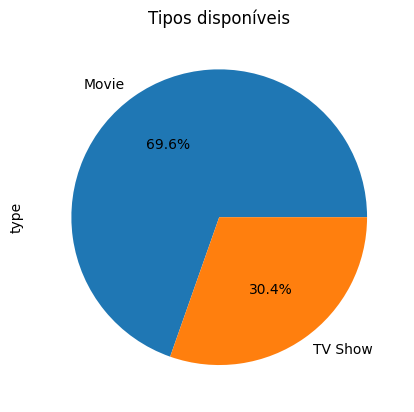

In [254]:
filtro_tv_show = df['type'] == 'TV Show'
df_tv_show = df[filtro_tv_show].count()
filtro_filme = df['type'] == 'Movie'
df_filme = df[filtro_filme].count()
print(f"Temos {df_tv_show[1]} séries disponíveis do tipo TV Show")
print(f"Temos {df_filme[1]} séries disponíveis do tipo Filme")
df['type'].value_counts().plot(kind='pie',title='Tipos disponíveis', autopct='%1.1f%%');

## 4 - Quantos registros no dataset estão sem o país especificado? Liste os seus tipos (filme ou série de tv) e quantidades.

In [258]:
print(f"Temos {df['country'].isna().sum()} registros sem país específicado!")
filtro_tipo_pais = (df['type']=='Movie') & (df['country'].isna()==True)
df_filtro = df[filtro_tipo_pais].count()
print(f"Temos {df_filtro[1]} filmes do tipo 'Movie' sem país definido!")
filtro_pais_nulo = (df['type']=='TV Show') & (df['country'].isna()==True)
df_filtro_nulo = df[filtro_pais_nulo].count()
print(f"Temos {df_filtro_nulo[0]} filmes do tipo 'TV Show' sem país definido!")

outra_forma = """
df_sem_pais = df.loc[df['country'].isna()]
df_sem_pais.shape 
RETORNA: (831,12)
df_sem_pais['type'].value_counts()
"""

Temos 831 registros sem país específicado!
Temos 440 filmes do tipo 'Movie' sem país definido!
Temos 391 filmes do tipo 'TV Show' sem país definido!


## 5 - Qual a data do primeiro filme disponibilizado e qual o seu título e país?

In [273]:
df_filmes = df.loc[df['type'] == 'Movie']
df_filmes['date_added'].min()
filtro_primeiro_ano = df_filmes['date_added'] == df_filmes['date_added'].min()
df_filmes[filtro_primeiro_ano]['country']
df_filmes[filtro_primeiro_ano]['title']
print("O primeiro filme a ser disponibilizado foi em 2008\nTítulo: To and From New York\nPaís: Estados Unidos")

O primeiro filme a ser disponibilizado foi em 2008
Título: To and From New York
País: Estados Unidos


## 6 - Qual o diretor com maior número de títulos (filme ou série)? Qual o seu país?

In [169]:
# ATOR
df['director'].value_counts()
filtro_ator = df['director']=='Rajiv Chilaka'

# PAÍS
df_ator = df[filtro_ator]
df_ator['country'].value_counts()

print(f'O diretor com maior quantidade de títulos é o Rajiv Chilaka, da India')

O diretor com maior quantidade de títulos é o Rajiv Chilaka, da India


## 7 - Qual é o filme de maior duração? E o de menor duração?

In [333]:
df_filme_duracao = df.loc[df['type'] == 'Movie']
df_duracao =  list(df_filme_duracao['duration'].replace(" min", ''))


lista_duracao=[]

for tempo in df_duracao:
    lista_duracao.append(str(tempo))

nova_lista=[]

for string in lista_duracao:
    nova_lista.append(string.replace(" min", ""))

lista_numerica=[]

for string in nova_lista:
    lista_numerica.append(float(string))

df_lista_numerica = pd.DataFrame(lista_numerica)
df_lista_numerica.max() # OS DOIS MAIORES NÃO SÃO VERDADEIROS, ACABOU SENDO O DE 253 minutos
df_lista_numerica.min() #3

df_maior = df.loc[df['duration'] == "312 min"]
df_maior['title']
print(f'O filme com menor duração é o "Silent"\nO filme com maior duração é o "The school of mischief"')


O filme com menor duração é o "Silent"
O filme com maior duração é o "The school of mischief"


## 8 - Qual o tempo médio de duração de um filme?

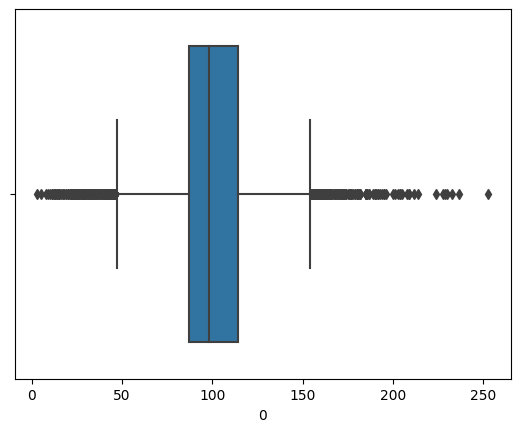

In [370]:
sns.boxplot(x=df_lista_numerica[0]);

In [376]:
lista = df_lista_numerica[0].sort_values(ascending=False)
lista.mean().round(2)
print("O tempo médio de duração é de 99 minutos")


O tempo médio de duração é de 99 minutos


## 9 - Liste os 3 países que produzem a maior quantidade de Séries (TV Show).

In [377]:
df[['country']].value_counts()

#PAISES: USA, INDIA, UNITED KINGDOM

# QUANTIDADE DE TV SHOWS
filtro_pais_filme = df['country']=='United States'
df_pais_filme = df[filtro_pais_filme]
pais = df_pais_filme.count()
print(f'O país que mais produz filmes é o Estados Unidos')

filtro_india = df['country']=='Japao'
df_pais_india = df[filtro_india]
pais_india = df_pais_india.count()
print(f'O país que mais produz filmes é o Japão')

filtro_uk = df['country']=='United Kingdom'
df_pais_uk = df[filtro_uk]
pais_uk = df_pais_uk.count()
print(f'O país que mais produz filmes é o Reino Unido')

O país que mais produz filmes é o Estados Unidos
O país que mais produz filmes é o Japão
O país que mais produz filmes é o Reino Unido


## 10 - Em qual ano  temos o maior número de séries e filmes brasileiros disponibilizados na Netflix?

In [382]:
filtro_brasil = df['country']=='Brazil'
df_pais_brasil = df[filtro_brasil]
df_pais_brasil['release_year'].value_counts()
lista_brasil = list(df_pais_brasil['release_year'].value_counts())
lista_brasil[0] # FOI 2020
print(f"O ano que mais teve lançamentos brasileiros na Netflix foi 2020")

O ano que mais teve lançamentos brasileiros na Netflix foi 2020


## 11 - Qual(ais) o(s) diretor(es) brasileiro(s) com o maior número de títulos (filme/série)?

In [232]:
filtro_brasil_diretor = df['country']=='Brazil'
df_diretor_brasil = df[filtro_brasil_diretor]
df_diretor_brasil['director'].value_counts() # Diego Pignataro e Lucas Margutti
print("Os diretores brasileiros com maior número de títulos são o Diego Pignataro e o Lucas Margutti")

Os diretores brasileiros com maior número de títulos são o Diego Pignataro e o Lucas Margutti


## 12 - Existem mais conteúdos para adultos ou para crianças e adolescentes?

In [387]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [391]:
adultos = ['TV-MA','R','NR']

df.query("rating in @adultos").shape

(4086, 12)

In [392]:
crianca_adolescente = ['TV-14','TV-PG','PG-13','TV-Y7','TV-Y','PG','TV-G','G']

df.query("rating in @crianca_adolescente").shape

(4702, 12)

In [393]:
print('Existem mais conteúdos para crianças e adolescentes')

Existem mais conteúdos para crianças e adolescentes
